<a href="https://colab.research.google.com/github/VintageGold/Outages_Prediction/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os
 
from google.colab import drive

drive.mount('/content/drive')
%cd drive/My\ Drive/
os.getcwd()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


'/content/drive/My Drive'

## Functions

In [3]:
import datetime as dt
def convert_dt(df,col_name=None,year=True,month=True):
    df[col_name] = pd.to_datetime(df[col_name])
    
    df['plot_date'] = pd.to_datetime(df[col_name].dt.strftime('%Y-%m-%d'))
    df['agg_date'] = df[col_name].dt.strftime('%m%d%Y')

    if year:
        df['year'] = df['agg_date'].str[-4:]
    if month:
        df['month'] = df['agg_date'].str[0:2]
        df = df.astype({'month': 'int64'})
    
    df = df.drop(columns='agg_date')
    return df

In [4]:
def get_month_season(df):
    df_month = pd.read_csv('UMBC_Energy/Universal_Data/months.csv')
    df = df.merge(df_month,on='month',how='left')
    df = df.astype({'month': 'object'})
    return df

# NOAA Weather Data



*  PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file) 
*   SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file) 
*  SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file) 
*  TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file 
*  TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
*  AWND = Average daily wind speed (meters per second or miles per hour as per user preference)








In [5]:
df_NOAA_Raw_All = pd.read_csv('UMBC_Energy/Raw/Raw_All_NOAA.csv',sep='|')
df_NOAA_Raw_All.head()

station_dt_key                 date  ...         State  Code
0  GHCND:US1DEKN0001_2015-01-01  2015-01-01T00:00:00  ...      Delaware    DE
1  GHCND:USC00283662_2015-01-01  2015-01-01T00:00:00  ...    New Jersey    NJ
2  GHCND:USC00442635_2015-01-01  2015-01-01T00:00:00  ...      Virginia    VA
3  GHCND:USC00440327_2015-01-01  2015-01-01T00:00:00  ...      Virginia    VA
4  GHCND:USC00366233_2015-01-01  2015-01-01T00:00:00  ...  Pennsylvania    PA

[5 rows x 23 columns]

In [11]:
df_NOAA_Raw_All.shape

(225170, 23)

###All the location is great,however too many could cause confusion. So we made a trimmed NOAA weather station dataset. The creation of the trimmed data set in found at https://github.com/VintageGold/Outages_Prediction/blob/master/WeatherStation_Criteria_RawAllNOAA.ipynb

In [13]:
#map_drop_cols = ['year','month']
df_map = df_NOAA_Raw_All.drop(columns='AWND').groupby('station').mean()
import plotly.express as px

fig = px.scatter_mapbox(df_map, lat="latitude", lon="longitude", hover_name=df_map.index,hover_data=df_map.columns,
                        color_discrete_sequence=["fuchsia"], zoom=3, height=700, title='Total NOAA Weather Stations Collected')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [7]:
df_NOAA_trim = pd.read_csv('UMBC_Energy/Raw/df_NOAA_Station_Trim_mkt_region.csv')
df_NOAA_trim.head()

Unnamed: 0            station  ... mkt_region                   region
0           0  GHCND:USC00182325  ...     MIDATL  Mid Atlantic - Dominion
1           1  GHCND:USC00182325  ...     MIDATL  Mid Atlantic - Dominion
2           2  GHCND:USC00182325  ...     MIDATL  Mid Atlantic - Dominion
3           3  GHCND:USC00182325  ...     MIDATL  Mid Atlantic - Dominion
4           4  GHCND:USC00182325  ...     MIDATL  Mid Atlantic - Dominion

[5 rows x 37 columns]

In [10]:
df_NOAA_trim.shape

(114923, 37)

In [12]:
map_drop_cols = ['year','month']
df_map = df_NOAA_trim.drop(columns= map_drop_cols)
import plotly.express as px

fig = px.scatter_mapbox(df_map, lat="latitude", lon="longitude", hover_name=df_map['Key'],
                        color='region', zoom=3, height=700, title='NOAA Weather Station by Region')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

## High Level view of NOAA weather data across the 4 years collected
  

*   Below we can see a strong seasonal pattern in TMAX and TMIN.
*   PRCP looks to be pretty constant throughout seasons.  
*   SNOW as expected is infrequent and only appear during the winter season and sometime early spring.  As Marylanders we have experienced that.
*   As we an see AWND is not accounted for enough so this feature is dropped.



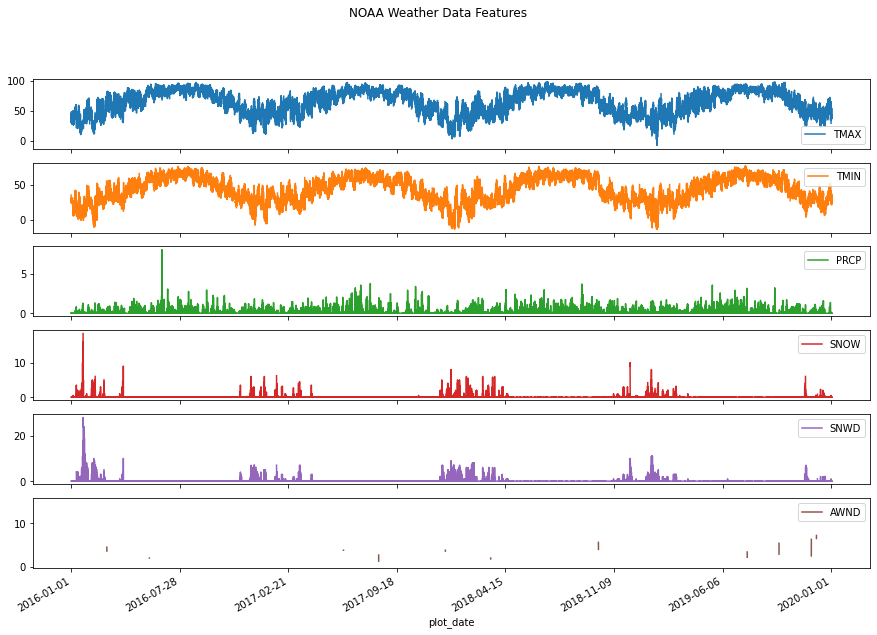

In [ ]:


plot_cols = ['plot_date','Code','season','year','month_name','mkt_region','region','PRCP','SNOW','SNWD','AWND','TMAX','TMIN']

df_plot = df_NOAA_trim[['TMAX','TMIN','PRCP','SNOW','SNWD','AWND','region','plot_date','season']].set_index('plot_date').sort_index(ascending=True).query('region == "Western"')


df_plot = df_plot['2016-01-01':'2020-01-02']

_ = df_plot.plot(subplots=True,title = 'NOAA Weather Data Features',figsize=(15,10))




## Monthly View of NOAA Weather Data

We have more detailed view at TMAX throughout the seasons clearly here.  The TMAX start off low rise during the spring spring even more in the summer and then begin to tail off in autumn/fall

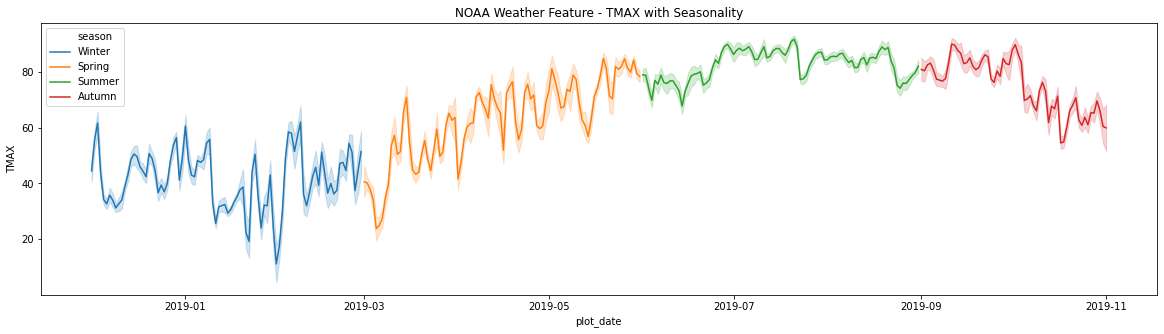

In [ ]:
plt.figure(figsize=(20,5))
df_plot = df_plot['2018-12-01':'2019-11-01']

df_plot = df_plot.reset_index()

date_time = pd.to_datetime(df_plot.pop('plot_date'),format='%Y-%m-%d')

_ = sns.lineplot(data=df_plot,x=date_time, y='TMAX',hue='season')
_ = plt.title('NOAA Weather Feature - TMAX with Seasonality')

We can see the same trend for TMIN as describe in TMAX

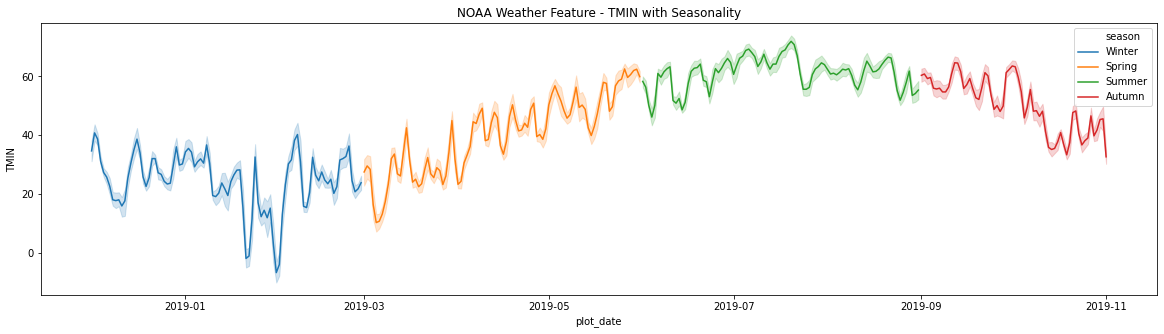

In [ ]:
plt.figure(figsize=(20,5))
_ = sns.lineplot(data=df_plot,x=date_time, y='TMIN',hue='season')
_ = plt.title('NOAA Weather Feature - TMIN with Seasonality')

PRCP tends to be consistent throughout the seasons

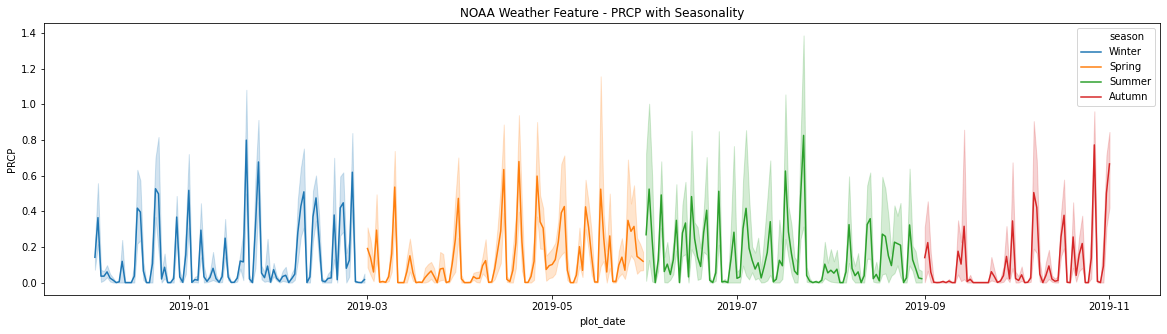

In [ ]:
plt.figure(figsize=(20,5))
_ = sns.lineplot(data=df_plot,x=date_time, y='PRCP',hue='season')
_ = plt.title('NOAA Weather Feature - PRCP with Seasonality')

SNOW as expected is active during the winter and early spring, and is flat during the summer and autumn

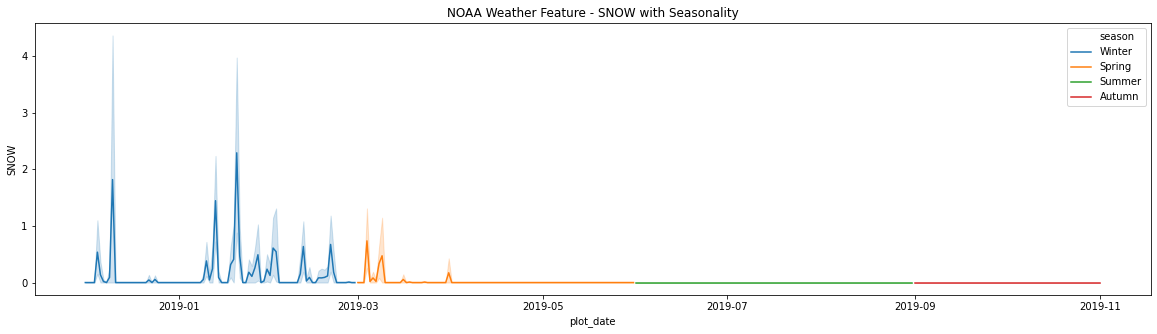

In [ ]:
plt.figure(figsize=(20,5))
_ = sns.lineplot(data=df_plot,x=date_time, y='SNOW',hue='season')
_ = plt.title('NOAA Weather Feature - SNOW with Seasonality')

SNWD as expected is active during the winter and early spring, and is flat during the summer and autumn

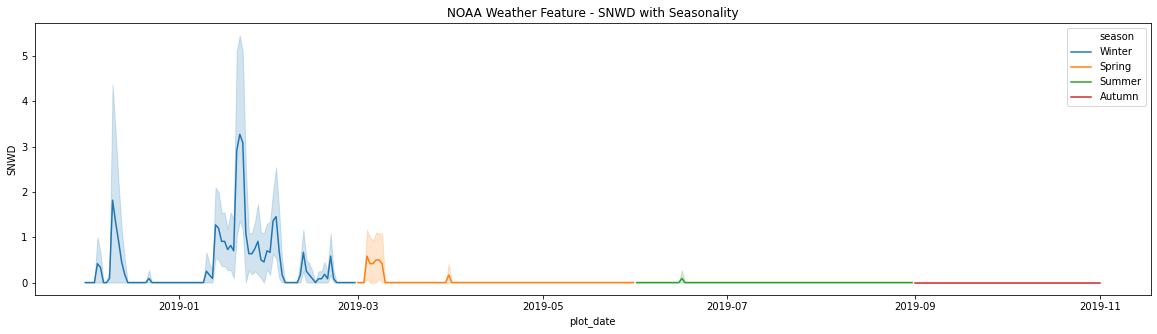

In [ ]:
plt.figure(figsize=(20,5))
_ = sns.lineplot(data=df_plot,x=date_time, y='SNWD',hue='season')
_ = plt.title('NOAA Weather Feature - SNWD with Seasonality')

# Outage 

- Planned Scheduled removal from service for inspection
      - Predetermined duration* 30 days prior
- Maintenance
      - Scheduled removal from service to perform repairs
      - Shorter than planned outages* 2 to 3 days prior
- Forced
	  - Immediate reduction in output by reason of an emergency or unanticipated failure


In [ ]:
df_outage = pd.read_csv('UMBC_Energy/forecast_matched_execution.csv',index_col=[0])

df_outage = df_outage.reset_index()

df_outage = convert_dt(df_outage,col_name='forecast_execution_date_ept')

df_outage = get_month_season(df_outage)

df_outage = df_outage[df_outage.region == 'Mid Atlantic - Dominion'].set_index('forecast_execution_date_ept')

df_outage = df_outage['2016-01-01':'2020-01-02'].drop(columns = 'index')

all_year_range = '2016 - 2020'

df_outage

forecast_date  ...  season
forecast_execution_date_ept                ...        
2016-12-31                     2016-12-31  ...  Winter
2016-12-30                     2016-12-30  ...  Winter
2016-12-29                     2016-12-29  ...  Winter
2016-12-28                     2016-12-28  ...  Winter
2016-12-27                     2016-12-27  ...  Winter
...                                   ...  ...     ...
2019-01-03                     2019-01-03  ...  Winter
2019-01-02                     2019-01-02  ...  Winter
2019-01-01                     2019-01-01  ...  Winter
2020-01-02                     2020-01-02  ...  Winter
2020-01-01                     2020-01-01  ...  Winter

[1460 rows x 14 columns]

### From this plot we can tell that Forced outages are the lowest form of outage.

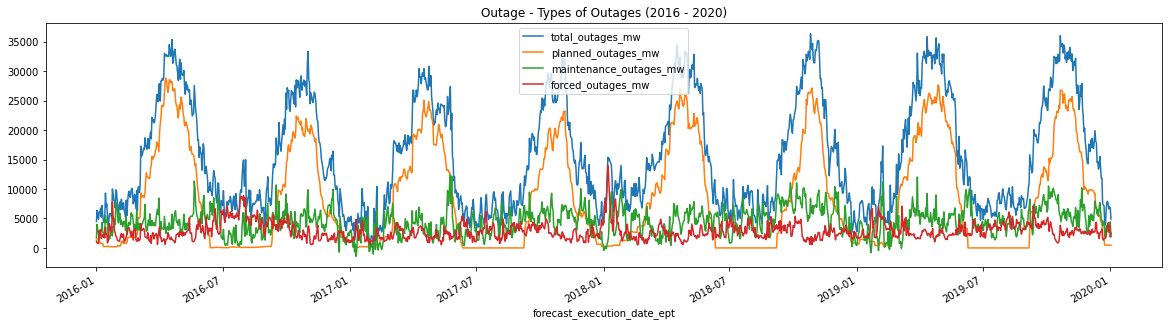

In [ ]:
df_outage_2019 = df_outage['2018-12-01':'2019-11-01']
_ = df_outage[['total_outages_mw','planned_outages_mw','maintenance_outages_mw','forced_outages_mw']].plot(title = f'Outage - Types of Outages ({all_year_range})',figsize=(20,5))

## From the plot below we can see an cyclical trend with a massive spike in January 2018

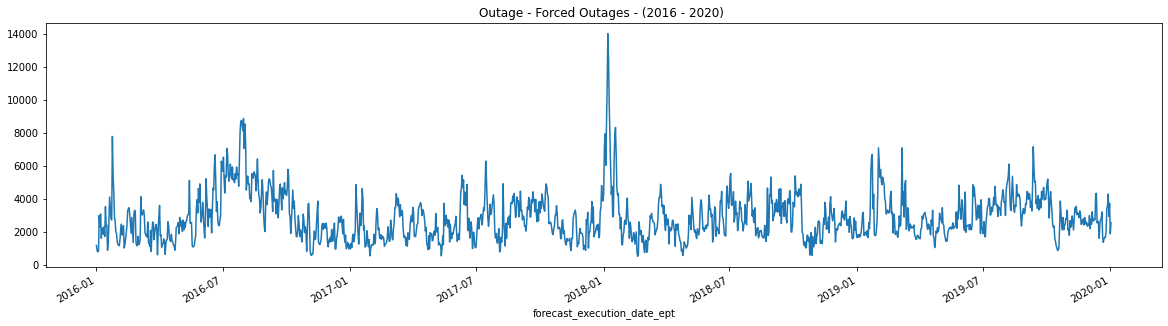

In [ ]:
_ = df_outage['forced_outages_mw'].plot(title = f'Outage - Forced Outages - ({all_year_range}) ',figsize=(20,5))

## If we select 2019 we will more outages happening in colder months than warmer months which is interesting and unexpected

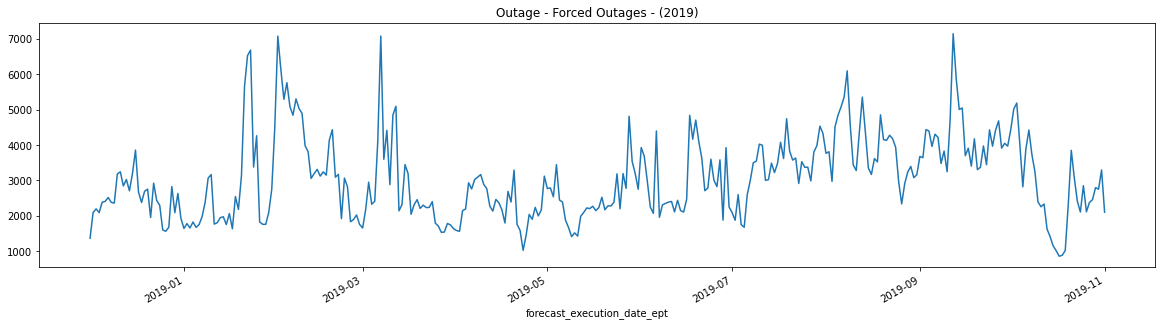

In [ ]:
year_range = '2019'
_ = df_outage_2019['forced_outages_mw'].plot(title = f'Outage - Forced Outages - ({year_range})',figsize=(20,5))

## When we color code the chart with seasons it's easier to decipher that there tends to be an increase when seasons change.  Such as April to May or 2019 - 04 to 2019 - 05.  In addtion 2019 - 08 to 2019 - 09.

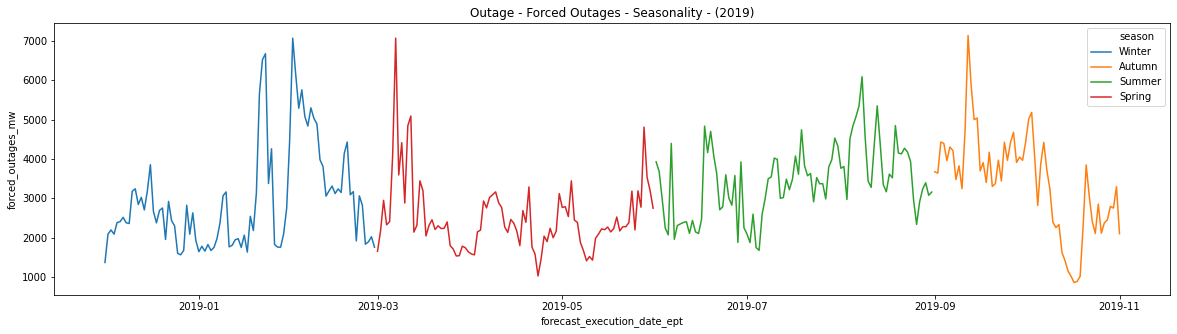

In [ ]:
plt.figure(figsize=(20,5))

df_outage_2019 = df_outage_2019.reset_index()
_ = sns.lineplot(data=df_outage_2019,x='forecast_execution_date_ept', y='forced_outages_mw',hue='season')


_ = plt.title(f'Outage - Forced Outages - Seasonality - ({year_range})')



# Usage

In [ ]:
df_usage = pd.read_csv('UMBC_Energy/Energy_usage/Usage_months_seasons_ept.csv',index_col=[0])

In [ ]:
df_usage

datetime_beginning_utc nerc_region  ... month_name  season
datetime_beginning_ept                                     ...                   
2015-01-01 00:00:00       2015-01-01 05:00:00         RFC  ...        Jan  Winter
2015-01-01 00:00:00       2015-01-01 05:00:00         RFC  ...        Jan  Winter
2015-01-01 00:00:00       2015-01-01 05:00:00         RFC  ...        Jan  Winter
2015-01-01 00:00:00       2015-01-01 05:00:00         RFC  ...        Jan  Winter
2015-01-01 00:00:00       2015-01-01 05:00:00         RFC  ...        Jan  Winter
...                                       ...         ...  ...        ...     ...
2020-07-01 23:00:00       2020-07-02 03:00:00         RFC  ...        Jul  Summer
2020-07-01 23:00:00       2020-07-02 03:00:00         RFC  ...        Jul  Summer
2020-07-01 23:00:00       2020-07-02 03:00:00         RFC  ...        Jul  Summer
2020-07-01 23:00:00       2020-07-02 03:00:00         RFC  ...        Jul  Summer
2020-07-01 23:00:00       2020-07-02 03:00:00         RTO  ...        Jul  Summer

[1372848 rows x 12 columns]

In [ ]:
df_outage = df_usage[df_usage.mkt_region == 'MIDATL']

df_usage = df_usage['2016-01-01':'2020-01-02']

### Usage data over the years looks consistent and looks hints to a predictable trend

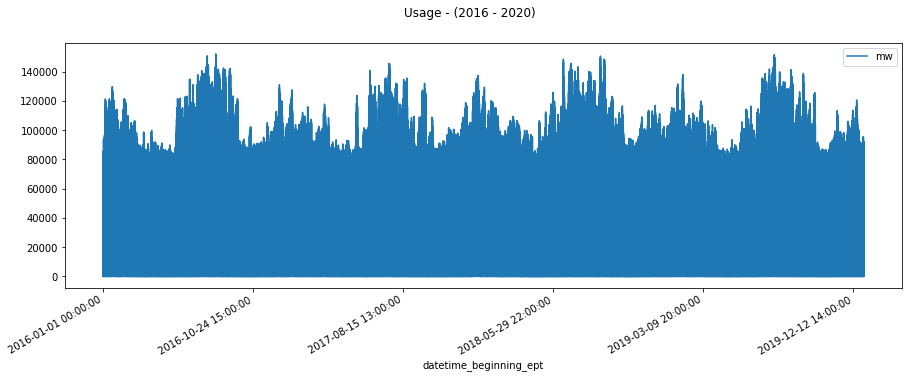

In [ ]:
_ = df_usage.drop(columns=['year','month']).plot(subplots=True,title = 'Usage - (2016 - 2020)',figsize=(15,5))

### Look at one year and see the trend.  I appears that the usage is high in the winter, falls off during spring, then hits the maximum peaks in the summer then tails off in the fall.

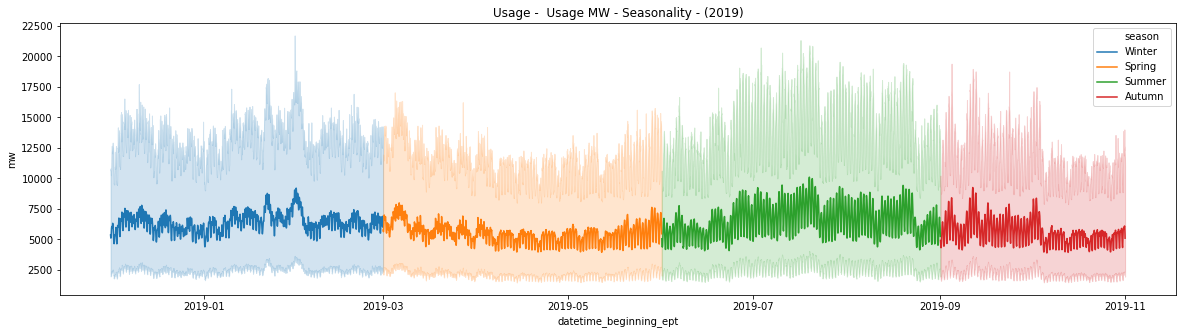

In [ ]:
plt.figure(figsize=(20,5))

df_usage_2019 = df_usage['2018-12-01':'2019-11-01']

df_usage_2019 = df_usage_2019.reset_index()

date_time = pd.to_datetime(df_usage_2019.pop('datetime_beginning_ept'),format='%Y-%m-%d %H:%M:%S')


_ = sns.lineplot(data=df_usage_2019,x=date_time, y='mw',hue='season')


_ = plt.title(f'Usage -  Usage MW - Seasonality - ({year_range})')



# Outage - Usage - Weather

In [ ]:
df = pd.read_csv('UMBC_Energy/Model_ready/Outage_Usage_Weather_ept.csv',index_col='plot_date')
df = df.reset_index()
df = df.astype({'year': 'object','month':'object'})
df = df.drop(columns=['AWND','total_outages_mw','planned_outages_mw','maintenance_outages_mw','plot_date','TDIFF'])
df = df.astype({'forced_outages_mw':'float64','Usage_mw':'float64'})

In [ ]:
sns.set_context(context=None, font_scale=.5, rc=None)

In [ ]:
df_all = df[df.select_dtypes(exclude='object').columns]
df_all



forced_outages_mw     Usage_mw      PRCP  ...  SNWD       TMAX       TMIN
0                1472.0  1105822.407  0.004255  ...   0.0  83.595745  58.266667
1                1838.0  1158822.118  0.058723  ...   0.0  83.787234  63.574468
2                 894.0   876844.075  0.222391  ...   0.0  64.957447  53.191489
3                1086.0   876853.950  0.112609  ...   0.0  65.511111  54.422222
4                 992.0   888819.936  0.092889  ...   0.0  67.282609  56.152174
...                 ...          ...       ...  ...   ...        ...        ...
3705             4496.0  1128450.113  0.254167  ...   0.0  82.909091  60.272727
3706             3752.0  1128068.148  0.171667  ...   0.0  81.727273  66.363636
3707             1959.0  1281585.133  0.073333  ...   0.0  81.090909  65.090909
3708             2165.0  1296044.971  0.164167  ...   0.0  85.454545  63.090909
3709             2564.0  1299621.398  0.064000  ...   0.0  84.600000  62.200000

[3710 rows x 7 columns]

### From the pair plot there are 3 areas of focus:



*   The moderately strong postive relationship between forced_outages_mw and Usage_mw
*   The crescent shape relationship between Usage_mw with TMAX and TMIN.  Indicating an increase in usage when extreme weather occurs. For example, extreme summer heat and extremem winter cold.
*   A predictable correlation between TMAX and TMIN, because temperature minimums are expected to be higher when maximum temperatures occur.





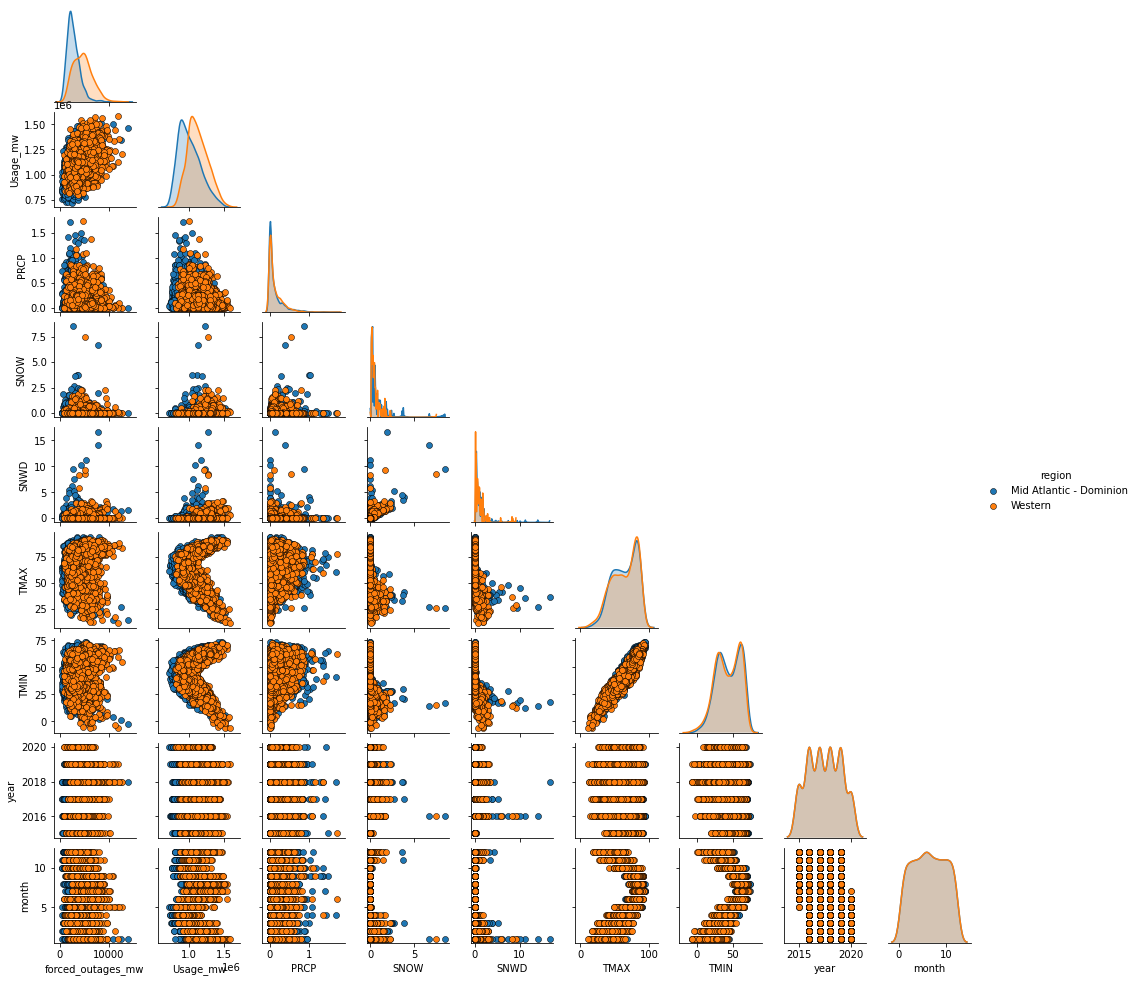

In [ ]:
outage_usage_weather_pp = sns.pairplot(df,height=1.5,
                  hue="region",
                  plot_kws=dict(edgecolor="k", linewidth=0.5),corner=True)

The Pearson Correlation Matrix below hints at a somewhat strong relationship between forced_outages_mw and Usage_mw.  This correlation is a good indicator that analysis should be around the intersection of other relationship in regard to forced_outages_mw and Usage_mw

Text(0.5, 1.0, 'Outage Usage Weather - Pearson Matrix')

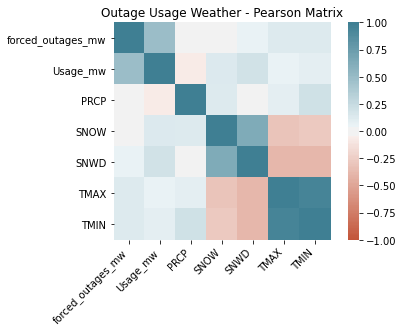

In [ ]:
corr = df_all.corr('pearson')

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.subplots_adjust(hspace = .5)
ax.set_title(f'Outage Usage Weather - Pearson Matrix')

### The Spearman correlation matrix highlights a previous weak linear relationship to a moderately strong negative non linear relationship between SNOW, SNWD in respect to TMAX and TMIN. This makes sense beacause snow fall and snow weight values should have yield different amounts of Snow fall or snow weight. 

Text(0.5, 1.0, 'Outage Usage Weather - Spearman Matrix')

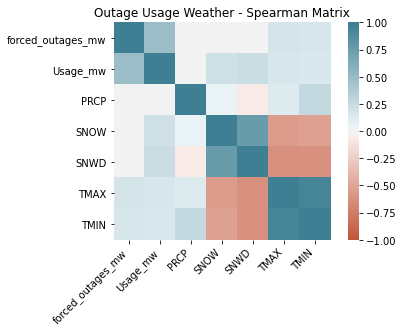

In [ ]:
corr = df_all.corr('spearman')

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.subplots_adjust(hspace = .5)
ax.set_title(f'Outage Usage Weather - Spearman Matrix')

### Decipher which region has a strong cluster with respect to the moderately strong postive relationship of Usage_mw and forced_outages_mw

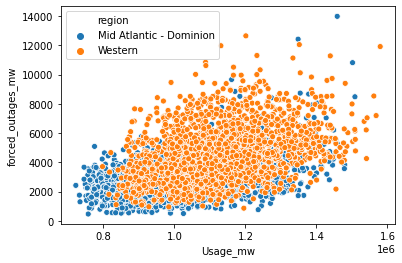

In [ ]:
_ = sns.scatterplot(x='Usage_mw',y='forced_outages_mw',data=df,hue='region')

## Mid Atlantic has a strong cluster

Mid Atlantic has a stronger cluster than Western, so Mid Atlantic will be the region of concentration

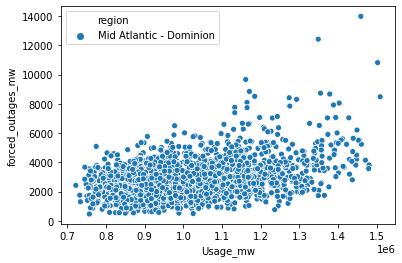

In [ ]:
df_midatl = df[df.region == 'Mid Atlantic - Dominion']
_ = sns.scatterplot(x='Usage_mw',y='forced_outages_mw',data=df_midatl,hue='region')

Western has moderately strong cluster

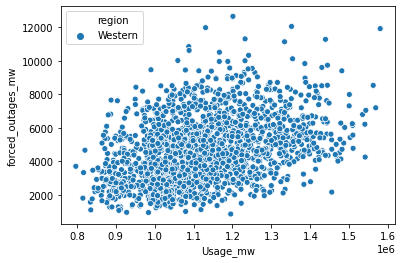

In [ ]:
df_western = df[df.region == 'Western']

_ = sns.scatterplot(x='Usage_mw',y='forced_outages_mw',data=df_western,hue='region')

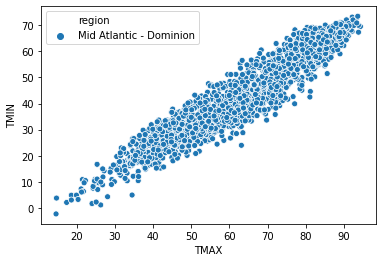

In [ ]:
df_midatl = df[df.region == 'Mid Atlantic - Dominion']
_ = sns.scatterplot(x='TMAX',y='TMIN',data=df_midatl,hue='region')

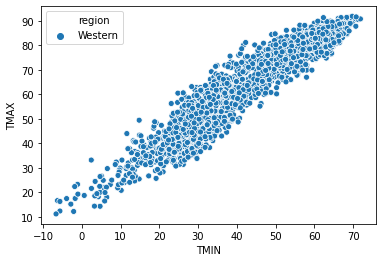

In [ ]:
df_western = df[df.region == 'Western']

_ = sns.scatterplot(x='TMIN',y='TMAX',data=df_western,hue='region')

## Interesting shape and plot with TMAX and TMIN

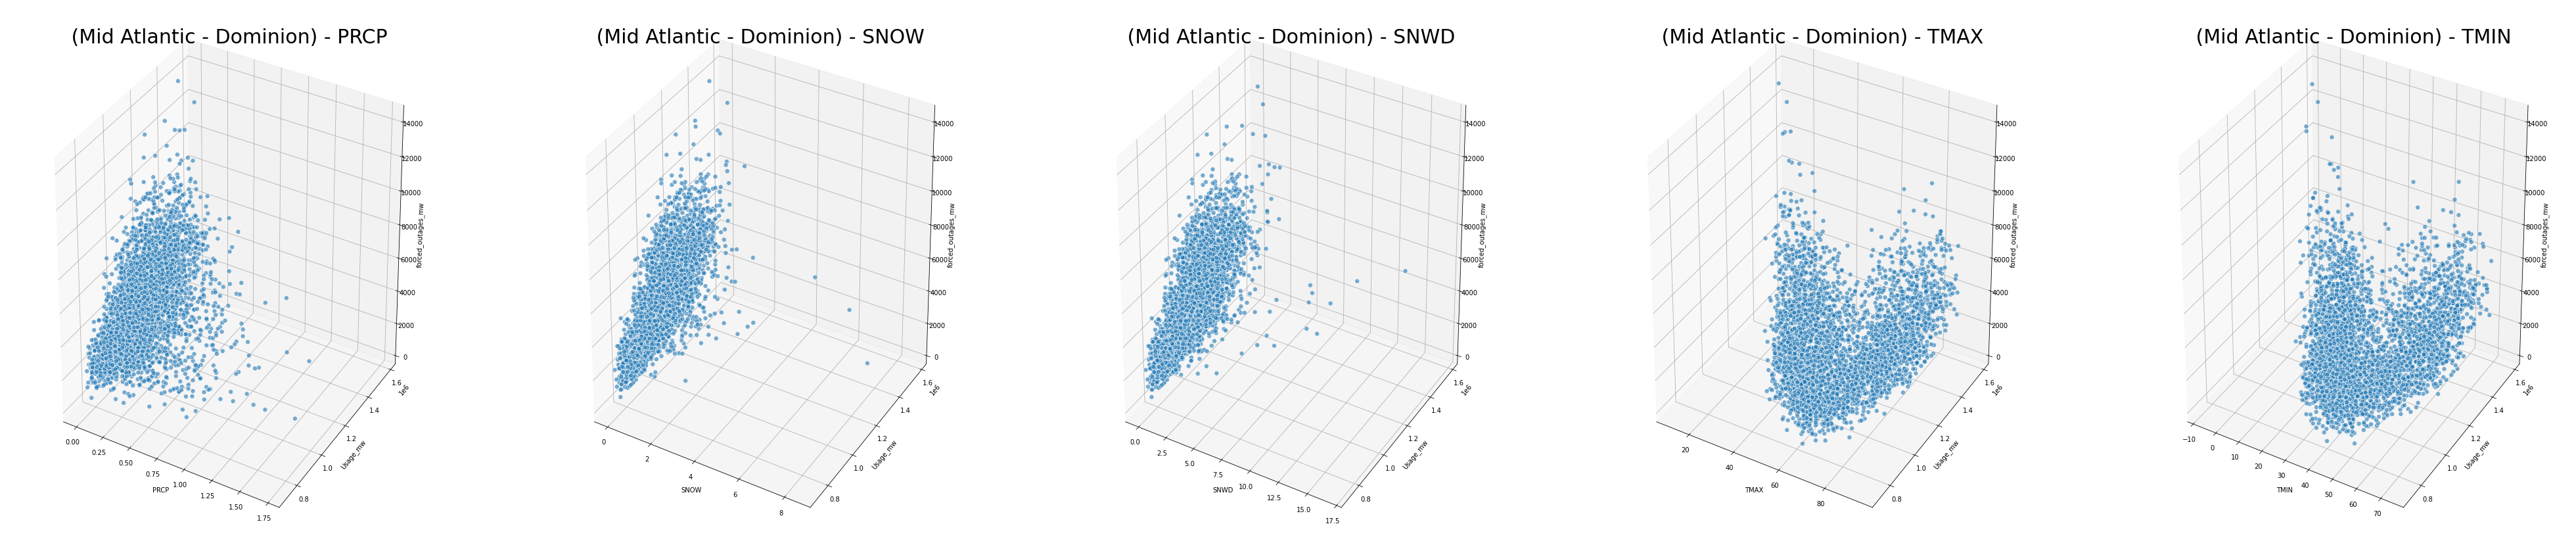

In [ ]:
df_all = df_midatl[df_midatl.select_dtypes(exclude='object').columns]



df_3d = df_all[[col for col in df_all.columns if col != 'Usage_mw']]
df_3d = df_3d[[col for col in df_3d.columns if col != 'forced_outages_mw']]
df_3d

# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth

sns.set_context(context=None, font_scale=10, rc=None)


#Make df without Usage_mw and forced_outages_mw


fig = plt.figure(figsize=(70,15))



for index, feature in enumerate(df_3d.columns,1):

    ax = fig.add_subplot(1,5,index,projection='3d')
    xs = df[f'{feature}']
    ys = df['Usage_mw']
    zs = df['forced_outages_mw']
    ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
    
    
    ax.set_title(f' (Mid Atlantic - Dominion) - {feature}',size=30)
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Usage_mw')
    ax.set_zlabel('forced_outages_mw')

In [ ]:
#Choose what column will color the scatter plot
color ='season'

### From the plot we can see that during either TMAX yields higher usage and higher forced_outages 

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_midatl, x='TMAX', y='Usage_mw', z='forced_outages_mw',
                color= color,width=1500, height=1000,opacity=0.3, title='(Mid Atlantic - Dominion) - TMAX - Usage_MW - Forced_Outages_Mw')
fig.show()



### Same relationship with Forced outages and Usage than TMAX

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='TMIN', y='Usage_mw', z='forced_outages_mw', title='TMIN - Usage_MW - Forced_Outages_Mw',
                color= color,width=1000, height=1000,opacity=0.3)
fig.show()